# Data Science - Laboratorio 1
## Análisis Exploratorio, PCA y Apriori
---
**Integrantes**
- Diego Leiva
- Pablo Orellana
---

## Análisis Exploratorio

### Comprensión Inicial

#### Importar Librerías

In [1]:
import os

# Manipulacion de datos
import pandas as pd
import numpy as np

# Librerias para visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Librerias para pre procesamiento de datos
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Librerias para clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Libreria de metricas
from sklearn.metrics import silhouette_score, accuracy_score

#### Cargar el Dataset al entorno

Fernandes,Kelwin, Cardoso,Jaime, and Fernandes,Jessica. (2017). Cervical Cancer (Risk Factors). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z310.

In [2]:
data = pd.read_csv('risk_factors_cervical_cancer.csv')

#### Visualizar estructura e información general del dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In [4]:
print(f"El dataset contiente: {data.shape[0]} observaciones y {data.shape[1]} variables")

El dataset contiente: 858 observaciones y 36 variables


In [5]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


**Variables identificadas**
- Age: Edad de la paciente 
- Number.of.sexual.partners: Cantidad de parejas sexuales que ha tenido la paciente desde que inició su vida sexual 
- First.sexual.intercourse: Edad a la que tuvo el primer encuentro sexual. 
- Num.of.pregnancies: Cantidad de embarazos 
- Smokes: Si fuma o no 
- Smokes.years: Años que lleva fumando 
- Smokes.packs.per.year: Cajetillas de cigarrillos por año que fuma la paciente 
- Hormonal.Contraceptives: Si usa anticonceptivos hormonales o no 
- Hormonal.Contraceptives.years: Años que lleva usando anticonceptivos hormonales 
- IUD: Si tiene colocado algún dispositivo intrauterino (DIU) 
- IUD.years: Años que lleva usando un DIU 
- STDs: Si ha tiene enfermedades de transmisión sexual (ETS) 
- STDs.number: Cuantas ETS ha tenido 
- STDs.condylomatosis: si ha tenido condilomatosis 
- STDs.cervical.condylomatosis: si ha tenido condilomatosis cervical 
- STDs.vaginal.condylomatosis: Si ha tenido condilomatosis vaginal 
- STDs.vulvo.perineal.condylomatosis: Si ha tenido condilomatosis vulvo perineal 
- STDs.syphilis: Si ha tenido Sífilis 
- STDs.pelvic.inflammatory.disease: Si ha tenido inflamaciones pélvicas 
- STDs.genital.herpes: si ha tenido herpes genital - STDs.molluscum.contagiosum: Si ha tenido molusco contagioso 
- STDs.AIDS: Si tiene SIDA 
- STDs.HIV: Si tiene VIH 
- STDs.Hepatitis.B: si ha tenido o tiene hepatitis B 
- STDs.HPV: Si ha tenido o tiene Virus del Papiloma Humano (VPH) 
- STDs.Number.of.diagnosis: Cantidad de diagnósticos de ETS 
- STDs.Time.since.first.diagnosis: Tiempo desde el primer diagnóstico 
- STDs.Time.since.last.diagnosis: Tiempo desde el último diagnóstico 
- Dx.Cancer: Si tiene diagnóstico de cáncer o no 
- Dx.CIN: Si tiene diagnóstico de NIC (Neoplasia Intraepitelial Cervical) 
- Dx.HPV: Si tiene diagnóstico de Virus del Papiloma Humano 
- Dx: Si tiene diagnóstico 
- Pruebas para diagnosticar 
- Hinselmann: Si hicieron Colposcopía 
- Schiller: Si hicieron la prueba de Schiller 
- Citology: Si hicieron citología o no. 
- Biopsy: Si hicieron Biopsia o no 

Nota: parece que los registros que no tienen datos estan marcados con el simbolo `?` por lo tanto sera necesario modificar esos registros para tener celdas vacias o nulas y manejarlas adecuadamente mas adelante.

In [6]:
data.replace('?', np.nan, inplace=True)

In [7]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


#### Identificación de Variables

Para asegurarse de que los tipos de variables estan bien categorizados es necesaria una transformacion previa de los tipos de datos por medio de inferencia.

In [8]:
# Se convierten las variables a un tipo mas adecaudo
# por medio de inferencia
data = data.infer_objects()

# Si existen nulos la inferencia no se realizara
# por lo tanto se trata de convertir las variables
for col in data.columns:
    try:
        data[col] = pd.to_numeric(data[col], errors='coerce')
    except ValueError:
        try:
            data[col] = pd.to_datetime(data[col], errors='coerce')
        except ValueError:
            pass

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

**Variables categóricas**

In [9]:
# Encontrar variables categoricas en el dataset
categorical = data.select_dtypes(include=['object']).columns.tolist()

print(f"Hay {len(categorical)} variables categoricas en el dataset:")
for column in categorical:
    print(f"- {column}")


# Contar las variables categoricas binarias en el dataset
binary_categorical = [col for col in categorical if data[col].nunique() == 2]

print(f"\nHay {len(binary_categorical)} variables categoricas binarias en el dataset de :")
for column in binary_categorical:
    print(f"- {column}")

Hay 0 variables categoricas en el dataset:

Hay 0 variables categoricas binarias en el dataset de :


**Variables numéricas**

In [10]:
# Encontrar variables numericas en el dataset de entreno
numerical = data.select_dtypes(exclude=['object']).columns.tolist()

# Contar las variables cuantitativas binarias en el dataset de entreno
binary = [col for col in numerical if data[col].nunique() == 2]

# Contar las variables cuantitativas discretas en el dataset de entreno
discrete = [col for col in numerical if data[col].dtype == int and not col in binary]

# Contar las variables cuantitativas continuas en el dataset de entreno
continuous = [col for col in numerical if col not in discrete]


print(f"Hay {len(numerical)} variables cuantitativas en el dataset\n")
print(f"Hay {len(binary)} variables cuantitativas binarias en el dataset:")
for column in binary:
    print(f"- {column}")

print("\n","-"*35,"\n")

print(f"{len(discrete)} variables cuantitativas discretas:")
for column in discrete:
    print(f"- {column}")

print("\n","-"*35,"\n")

print(f"{len(continuous)} variables cuantitativas continuas:")
for column in continuous:
    print(f"- {column}")
print("-"*35)

Hay 36 variables cuantitativas en el dataset

Hay 22 variables cuantitativas binarias en el dataset:
- Smokes
- Hormonal Contraceptives
- IUD
- STDs
- STDs:condylomatosis
- STDs:vaginal condylomatosis
- STDs:vulvo-perineal condylomatosis
- STDs:syphilis
- STDs:pelvic inflammatory disease
- STDs:genital herpes
- STDs:molluscum contagiosum
- STDs:HIV
- STDs:Hepatitis B
- STDs:HPV
- Dx:Cancer
- Dx:CIN
- Dx:HPV
- Dx
- Hinselmann
- Schiller
- Citology
- Biopsy

 ----------------------------------- 

2 variables cuantitativas discretas:
- Age
- STDs: Number of diagnosis

 ----------------------------------- 

34 variables cuantitativas continuas:
- Number of sexual partners
- First sexual intercourse
- Num of pregnancies
- Smokes
- Smokes (years)
- Smokes (packs/year)
- Hormonal Contraceptives
- Hormonal Contraceptives (years)
- IUD
- IUD (years)
- STDs
- STDs (number)
- STDs:condylomatosis
- STDs:cervical condylomatosis
- STDs:vaginal condylomatosis
- STDs:vulvo-perineal condylomatosis
- ST

In [11]:
# Contar las variables categoricas en el dataset de entreno
for column in numerical:
    print(data[column].value_counts())
    print('\n', '-'*35, '\n')

Age
23    54
18    50
21    46
20    45
19    44
25    39
24    39
26    38
28    37
30    35
17    35
27    33
29    33
22    30
35    29
33    28
31    27
34    24
36    24
16    23
15    21
32    18
37    17
41    13
40    12
39     9
38     9
44     6
42     6
45     6
14     5
43     5
46     3
52     2
49     2
48     2
70     2
51     1
59     1
79     1
47     1
84     1
13     1
50     1
Name: count, dtype: int64

 ----------------------------------- 

Number of sexual partners
2.0     272
3.0     208
1.0     206
4.0      78
5.0      44
6.0       9
7.0       7
8.0       4
15.0      1
10.0      1
28.0      1
9.0       1
Name: count, dtype: int64

 ----------------------------------- 

First sexual intercourse
15.0    163
17.0    151
18.0    137
16.0    121
14.0     79
19.0     60
20.0     37
13.0     25
21.0     20
23.0      9
22.0      9
26.0      7
27.0      6
12.0      6
24.0      6
29.0      5
28.0      3
25.0      2
11.0      2
10.0      2
32.0      1
Name: count, dtype: i

----
### Preprocesamiento y Limpieza de datos

#### Verificación y manejo de valores Nulos o faltantes

**Visualizar la data faltante**

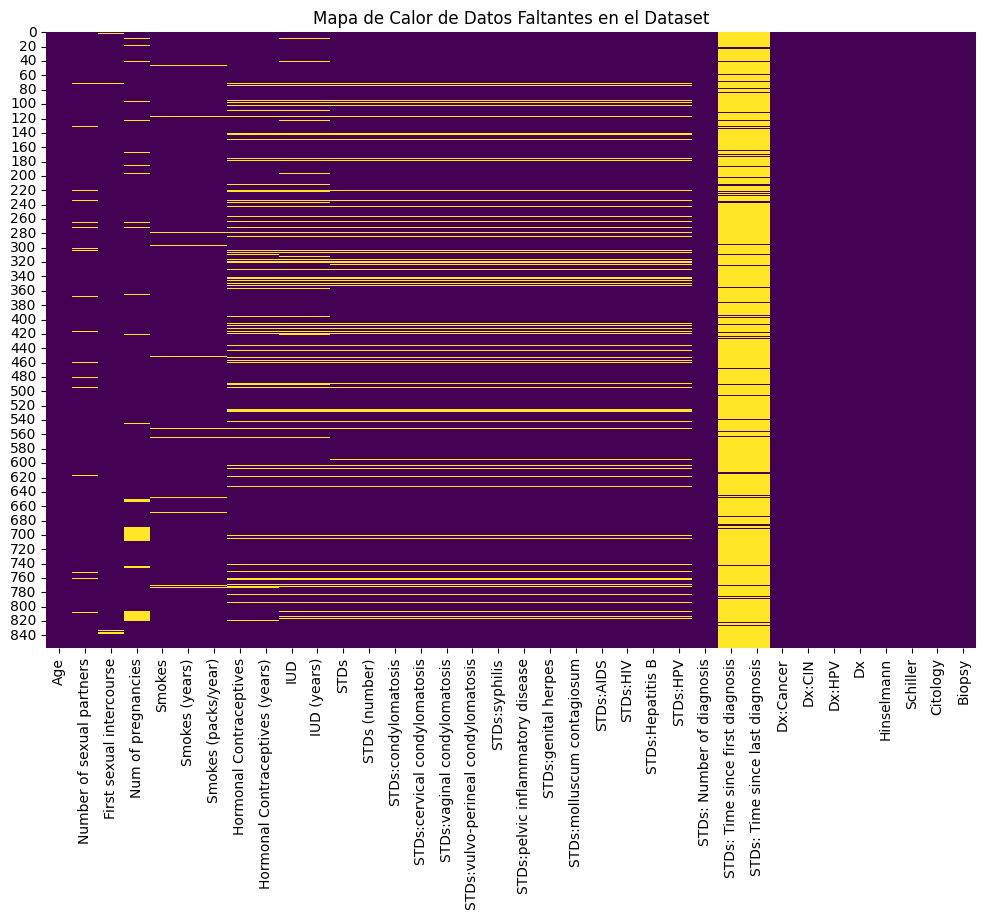

In [12]:
# Crear un mapa de calor para visualizar los datos faltante
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Datos Faltantes en el Dataset')
plt.show()

In [13]:
# Calcular el porcentaje de valores nulos para cada tipo
null_percentage_numeric = data[numerical].isnull().mean() * 100
print(f"Porcentaje de data faltante en variables numericas:")
print(null_percentage_numeric.sort_values(ascending=False))

Porcentaje de data faltante en variables numericas:
STDs: Time since first diagnosis      91.724942
STDs: Time since last diagnosis       91.724942
IUD                                   13.636364
IUD (years)                           13.636364
Hormonal Contraceptives               12.587413
Hormonal Contraceptives (years)       12.587413
STDs:HPV                              12.237762
STDs:AIDS                             12.237762
STDs:Hepatitis B                      12.237762
STDs:HIV                              12.237762
STDs                                  12.237762
STDs:cervical condylomatosis          12.237762
STDs:vulvo-perineal condylomatosis    12.237762
STDs:syphilis                         12.237762
STDs:pelvic inflammatory disease      12.237762
STDs:vaginal condylomatosis           12.237762
STDs:genital herpes                   12.237762
STDs:molluscum contagiosum            12.237762
STDs:condylomatosis                   12.237762
STDs (number)                       

Es evidente que hay 2 variables del dataset que tienen una mayor cantidad de valores faltantes. Las variables `STDs: Time since first diagnosis` y `STDs: Time since last diagnosis` carecen del mas del 90% de sus datos.


Asimismo hay 18 variables adicionales que tienen mas del 10% de sus valores faltantes.

**Evaluación de impacto de eliminación de nulos**

In [14]:
data_copy = data.copy()

# Eliminar filas con cualquier valor nulo
data_raw_clean = data_copy.dropna()

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_raw_clean.shape[0]
remaining_records_percentage = (remaining_records / data_copy.shape[0]) * 100

print(f"Si se eliminacen todas las observaciones con valores nulos, \
      \nquedarian {remaining_records} registros, \
      \n{remaining_records_percentage:.2f}% de la data original")

Si se eliminacen todas las observaciones con valores nulos,       
quedarian 59 registros,       
6.88% de la data original


Esta claro que eliminar todos los registros nulos tiene un gran impacto sobre el dataset, dejando apenas un 6.88% de los datos originales, en consecuencia, se ha determinado que esta no es una acción viable para el análisis.

La accion a probar a continuacion será eliminar las variables con alto porcentaje de valores faltanes, y eliminar solo los registros de aquellas variables que tienen de un 10%+ de valores faltantes, y para aquellos con porcentajes menores imputar valores de media o moda para evitar perdida de datos, y protegerse contra un sesgo debido a la imputación de datos.

In [15]:
data_clean = data.copy()


data_clean.drop(['STDs: Time since first diagnosis',
                'STDs: Time since last diagnosis'], 
                axis=1, 
                inplace=True)

numerical_temp = numerical.copy()
numerical_temp.remove('STDs: Time since first diagnosis')
numerical_temp.remove('STDs: Time since last diagnosis')

# Imputar los valores faltantes con la media para variables continuas
# con menos de 10% de valores faltantes
for column in numerical_temp:
    if data_clean[column].isnull().mean() < 0.1:
        data_clean[column] = data_clean[column].fillna(data_clean[column].median())

# Eliminar las observaciones con valores faltantes para variables continuas
# con más de 10% de valores faltantes
for column in numerical_temp:
    if data_clean[column].isnull().mean() >= 0.1:
        data_clean.dropna(subset=[column], inplace=True)

# Verificar cuántos registros quedan después de eliminar los nulos
remaining_records = data_clean.shape[0]
remaining_records_percentage = (remaining_records / data_copy.shape[0]) * 100

print(f"Si se eliminacen todas las observaciones con valores nulos, \
      \nquedarian {remaining_records} registros, \
      \n{remaining_records_percentage:.2f}% de la data original")

Si se eliminacen todas las observaciones con valores nulos,       
quedarian 750 registros,       
87.41% de la data original


Esta nueva estrategia tiene un impacto mucho menor que solo eliminar todos los registros con valores nulos. Ahora se conservan casi el 90% de los datos originales en lugar de solo el 6%. 
La estrategia asegura la confiabilidad de los datos, al eliminar variables con grandes cantidades de valores nulos, y eliminar registros con valores nulos mayores al 10% se previene la incorporacion de un sesgo dentro de los datos. Asimismo, el imputar valores solo para aquellas variables bajo el 10% de valores faltantes previene que se pierdan mas registros, y al ser un porcentaje tan bajo, tambien se evita la creacion de sesgos.

#### Evaluación de correlación entre variables cuantitativas